# 模型验证

In [2]:
import tushare as ts 
token='829a1fbce8eb0e34f05ab19906d0e08227c6f64261a81272aa078ccd'
pro=ts.pro_api(token)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 设置显示列长和行数
pd.set_option('display.max_columns', 20, 'display.min_rows', 50)
#正确显示中文和负号
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style({'font.sans-serif':['Arial Unicode MS', 'Arial']}) # use sns default theme and set font for Chinese

In [3]:
# 以新华制药(000965.SZ)为例
# 获取日线行情数据
df = pro.daily(ts_code='000756.SZ', start_date='20220314', end_date='20220513')
df = df[::-1].reset_index(drop=True)
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000756.SZ,20220314,9.72,9.77,9.29,9.30,9.63,-0.33,-3.4268,128903.15,123402.355
1,000756.SZ,20220315,9.35,9.40,8.52,8.55,9.30,-0.75,-8.0645,154959.71,138469.229
2,000756.SZ,20220316,8.71,8.82,8.14,8.72,8.55,0.17,1.9883,149639.81,127065.557
3,000756.SZ,20220317,8.71,9.43,8.65,9.15,8.72,0.43,4.9312,178600.37,163258.792
4,000756.SZ,20220318,9.10,9.33,9.07,9.23,9.15,0.08,0.8743,89483.05,82210.577
5,000756.SZ,20220321,9.23,9.58,9.21,9.41,9.23,0.18,1.9502,131225.03,123101.458
6,000756.SZ,20220322,9.42,9.45,9.20,9.29,9.41,-0.12,-1.2752,84249.77,78201.241
7,000756.SZ,20220323,9.30,9.37,9.15,9.17,9.29,-0.12,-1.2917,78098.21,72068.663
8,000756.SZ,20220324,9.08,9.72,9.02,9.62,9.17,0.45,4.9073,220746.44,209060.816
9,000756.SZ,20220325,9.55,10.58,9.46,10.04,9.62,0.42,4.3659,460775.68,467179.889


# 收盘价
2022年3月14日到5月13日的收盘价长这样
![000965.SZ](000965.png)

In [4]:
ct = datetime.datetime.strptime('20220513', '%Y%m%d')
ct

datetime.datetime(2022, 5, 13, 0, 0)

# 模型一
直接连接首尾两点计算斜率, $Y=log(y)$, $y$ 为每日收盘价 
$$Y=b+k\times x$$
$x$为天数，$k$为斜率，在连板的情况下$k\approx 0.1$, $b$与初始资金有关。
根据斜率进行打分
$$\mathrm{annualized\ return}=(e^{k})^{250} - 1$$
score设为annualized return


In [5]:
# 以最近momentum天为例计算其斜率k
momentum = 29
x = np.arange(momentum)
y = df['close']
y

0      9.30
1      8.55
2      8.72
3      9.15
4      9.23
5      9.41
6      9.29
7      9.17
8      9.62
9     10.04
10     9.65
11     9.79
12     9.58
13     9.84
14     9.05
15     9.53
16     9.06
17     8.66
18     8.33
19     8.42
20     8.18
21     8.43
22     8.84
23     8.71
24     8.93
25     9.82
26    10.80
27     9.72
28     9.38
29    10.32
30    11.35
31    12.49
32    13.74
33    15.11
34    16.62
35    18.28
36    20.11
37    22.12
38    24.33
39    26.76
Name: close, dtype: float64

In [6]:
logy = np.log(y[-momentum:])
logy

11    2.281361
12    2.259678
13    2.286456
14    2.202765
15    2.254445
16    2.203869
17    2.158715
18    2.119863
19    2.130610
20    2.101692
21    2.131797
22    2.179287
23    2.164472
24    2.189416
25    2.284421
26    2.379546
27    2.274186
28    2.238580
29    2.334084
30    2.429218
31    2.524928
32    2.620311
33    2.715357
34    2.810607
35    2.905808
36    3.001217
37    3.096482
38    3.191710
39    3.286908
Name: close, dtype: float64

In [7]:
dates = df['trade_date'][-momentum:]
dates

11    20220329
12    20220330
13    20220331
14    20220401
15    20220406
16    20220407
17    20220408
18    20220411
19    20220412
20    20220413
21    20220414
22    20220415
23    20220418
24    20220419
25    20220420
26    20220421
27    20220422
28    20220425
29    20220426
30    20220427
31    20220428
32    20220429
33    20220505
34    20220506
35    20220509
36    20220510
37    20220511
38    20220512
39    20220513
Name: trade_date, dtype: object

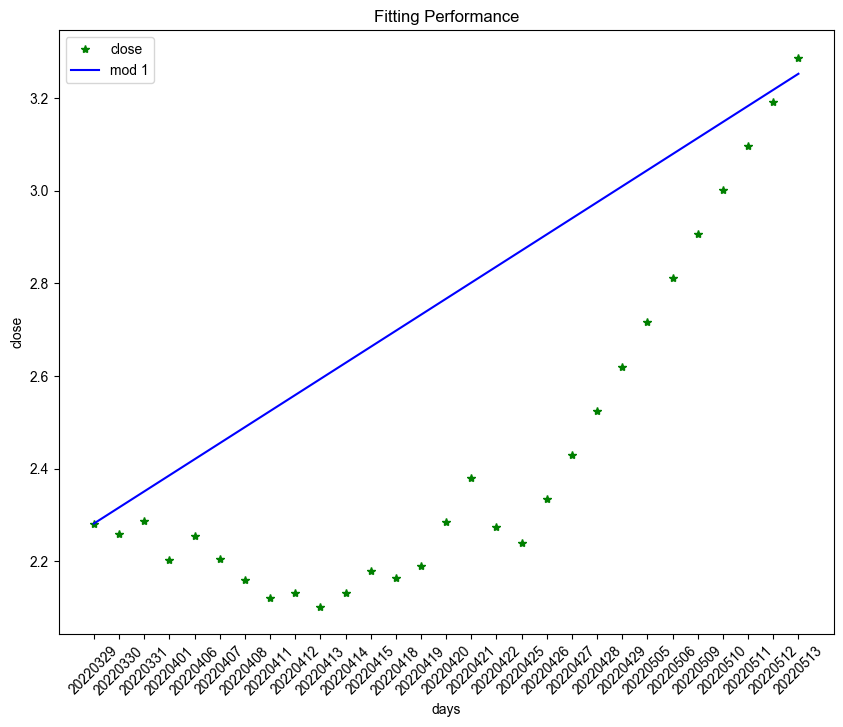

In [8]:
k = (logy.iloc[-1]-logy.iloc[0])/momentum
yy1 = k * x + logy.iloc[0]
# plot y and yy
fig = plt.figure(figsize=(10,8),dpi=100)
plt.plot(dates,logy,'g*', label='close')
plt.plot(dates,yy1,'b-', label='mod 1')
plt.title('Fitting Performance')
# set xtick angle
plt.xticks(rotation=45)
plt.xlabel('days')
plt.ylabel('close')
plt.legend()
plt.savefig('fitting_performance.png', dpi=300, facecolor='white')

In [9]:
Y = np.log(df['close'])
Y

0     2.230014
1     2.145931
2     2.165619
3     2.213754
4     2.222459
5     2.241773
6     2.228939
7     2.215937
8     2.263844
9     2.306577
10    2.266958
11    2.281361
12    2.259678
13    2.286456
14    2.202765
15    2.254445
16    2.203869
17    2.158715
18    2.119863
19    2.130610
20    2.101692
21    2.131797
22    2.179287
23    2.164472
24    2.189416
25    2.284421
26    2.379546
27    2.274186
28    2.238580
29    2.334084
30    2.429218
31    2.524928
32    2.620311
33    2.715357
34    2.810607
35    2.905808
36    3.001217
37    3.096482
38    3.191710
39    3.286908
Name: close, dtype: float64

In [10]:
slope_num = Y.size - momentum # 可以计算多少个斜率
slope_num

11

In [17]:
slope = [(Y[i+momentum] - Y[i])/momentum for i in range(slope_num)]
slope

[0.0035885986170416002,
 0.009768498654439402,
 0.012389968490227516,
 0.014019220948509416,
 0.016996473371375418,
 0.019614959856207374,
 0.023340310800008857,
 0.027078617845385778,
 0.02871165213712134,
 0.03052182905282236,
 0.03517070068652183]

In [18]:
# calculate r squared
r_squared_list = []
for i in range(slope_num):
    y = slope[i] * x + Y[i]
    r_squared = 1 - (sum(Y[i:i+momentum] - y)**2 / ((len(y) - 1) * np.var(Y[i:i+momentum], ddof=1)))
    r_squared_list.append(r_squared)

r_squared_list

[-26.846440580309523,
 -23.111939494719266,
 -58.66890798904764,
 -95.74493295381646,
 -90.96043768728062,
 -84.33395749889868,
 -66.51366549562164,
 -52.67297011797189,
 -51.82538779744218,
 -49.21014030518744,
 -36.72264876026081]

In [11]:
annualized_returns = np.power(np.exp(slope),250) - 1
annualized_returns

array([1.45260237e+00, 1.04974430e+01, 2.11423513e+01, 3.22749625e+01,
       6.90436306e+01, 1.33792959e+02, 3.41091314e+02, 8.70010874e+02,
       1.30917112e+03, 2.05899176e+03, 6.58482685e+03])

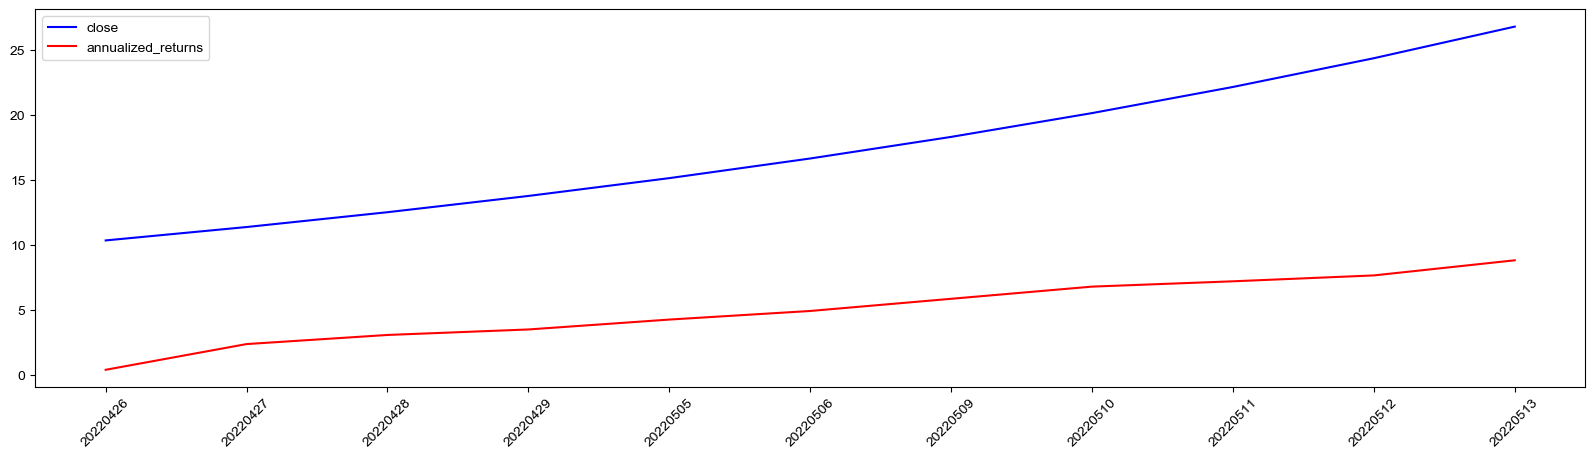

In [12]:
fig, ax = plt.subplots(1,1, figsize = (20,5), dpi = 100)
ax.plot(df['trade_date'][-slope_num:], df['close'][-slope_num:],'b-', label = 'close')
ax.plot(df['trade_date'][-slope_num:],np.log(annualized_returns),'r-', label = 'annualized_returns')
# rotate xlabel 45 degree
ax.tick_params(axis='x', labelrotation = 45)
ax.legend()
fig.savefig('annualized_returns.png', dpi=300, facecolor = 'white')

# 模型二
用momentum个数据点做fit，根据fit出来的斜率和R2来计算annualized return和对模型进行修正**score=R2 * annualized_returns**

# 模型二拟合效果
同样以最近momentum天为例

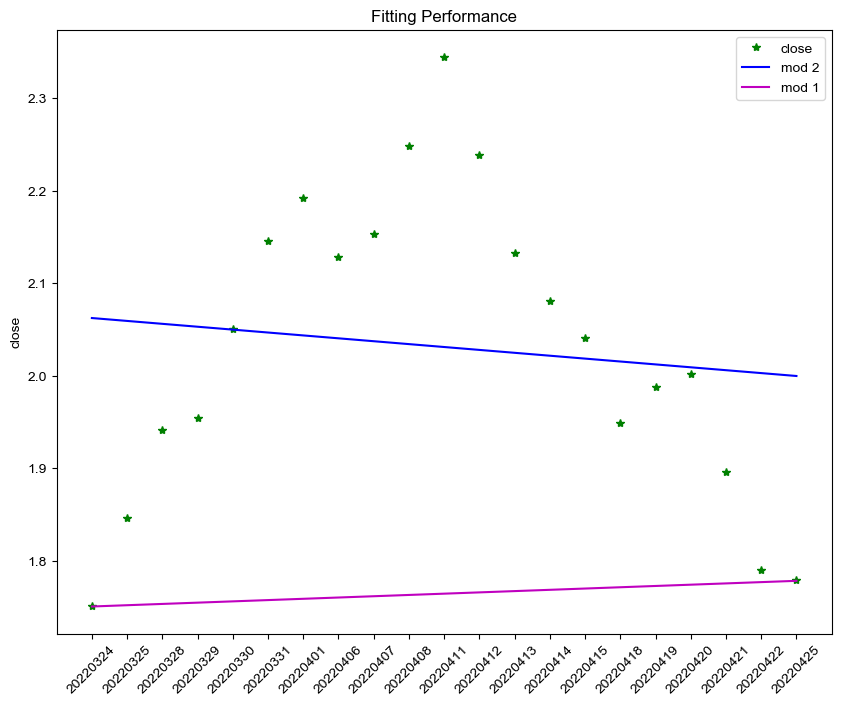

In [22]:
slop_tmp, intercept_tmp = np.polyfit(x, Y[-momentum:], 1)
yy2 = slop_tmp * x + intercept_tmp
fig = plt.figure(figsize=(10,8),dpi=100)
plt.plot(df['trade_date'][-momentum:], Y[-momentum:],'g*', label='close')
plt.plot(df['trade_date'][-momentum:], yy2,'b-', label='mod 2')
plt.plot(df['trade_date'][-momentum:],yy1,'m-', label='mod 1')
plt.title('Fitting Performance')
# plt.xlabel('days')
plt.xticks(rotation=45)
plt.ylabel('close')
plt.legend()
plt.savefig('fitting_performance2.png', dpi=300, facecolor='white')

In [23]:
score_list1 = []
# x = np.arange(momentum)
for n in range(slope_num):
    # fit y and x
    slope, intercept = np.polyfit(x, Y[n:n+momentum], 1)
    # calculate the R^2
    r_squared = 1 - (np.sum((Y[n:n+momentum] - (slope * x + intercept))**2)/np.sum((Y[n:n+momentum] - np.mean(Y[n:n+momentum]))**2))
    # r_squared2 = 1 - (np.sum((Y - (slope * x + intercept))**2)/((len(Y) - 1) * np.var(Y,ddof=1)))
    # print(f'r_squared: {r_squared}, r_squared2: {r_squared2}')
    annualized_returns2 = np.power(np.exp(slope),250) - 1
    score = r_squared * annualized_returns2
    score_list1.append(score)

score_list1

[1116.7093150812038,
 5640.043519553031,
 29209.994351380454,
 116038.75045204608,
 508455.47829930263,
 2304013.027306895,
 8728037.556525355,
 17224637.327229664,
 25527358.513855457,
 33823334.79032847,
 37201158.25782191,
 22519178.18265958,
 9070089.949883105,
 1716930.683831067,
 190469.44351985827,
 14964.498026991943,
 1417.375429354082,
 145.047497285924,
 8.328022449755904,
 0.09868266736392196]

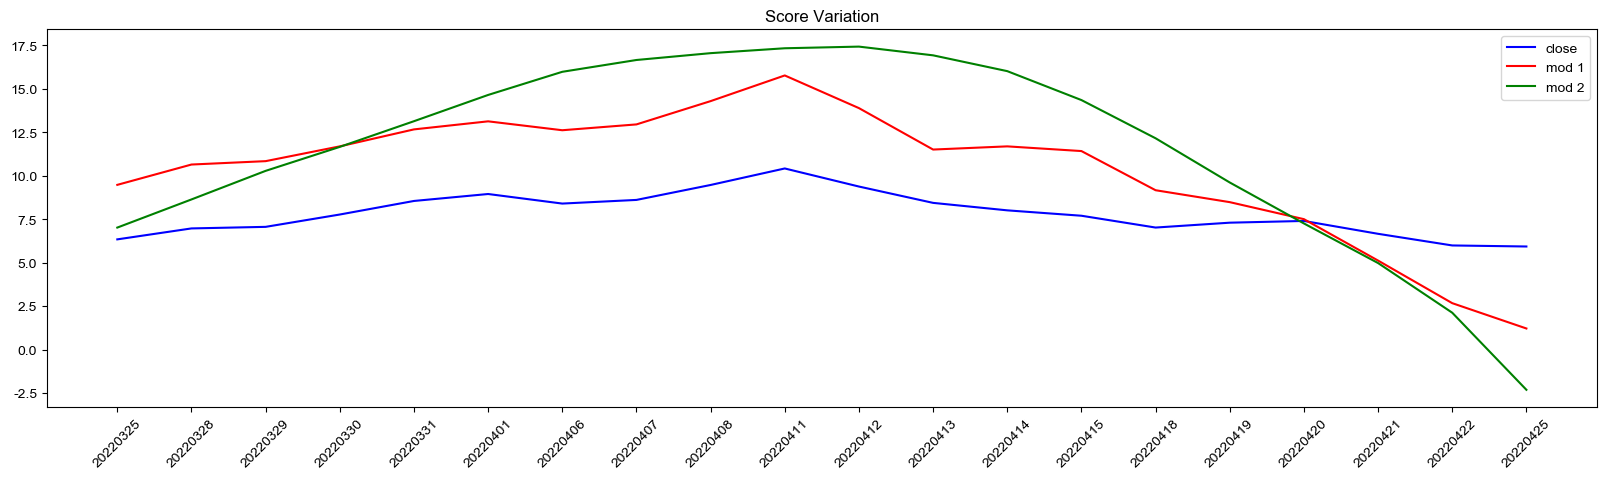

In [25]:
fig, ax = plt.subplots(1,1, figsize = (20,5), dpi = 100)
ax.plot(df['trade_date'][-slope_num:], df['close'][-slope_num:],'b-', label = 'close')
ax.plot(df['trade_date'][-slope_num:],np.log(annualized_returns),'r-', label = 'mod 1')
ax.plot(df['trade_date'][-slope_num:],np.log(score_list1),'g-', label = 'mod 2')
# rotate x label 45 degree
ax.set_title('Score Variation')
ax.tick_params(axis='x', labelrotation = 45)
ax.legend()
fig.savefig('score_variation.png', dpi=300, facecolor = 'white')

# 模型三
用scikit-learn多参数回归，加入交易量Vol，也可以试验多项式回归。
多元回归
$$y=\hat{\theta} * \hat{x}$$
其中$\hat{\theta} = \theta_0, \theta_1, \dots, \theta_n$ , $\hat{x} = x_0, x_1,\dots,x_n$, $n$为特征个数

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
df['num'] = np.arange(len(df.close))
X = df[['num', 'vol']].to_numpy()
y = df['close'].to_numpy()
y = np.log(y)

In [28]:
X

array([[0.00000000e+00, 4.39982770e+05],
       [1.00000000e+00, 2.25987500e+05],
       [2.00000000e+00, 1.74419200e+05],
       [3.00000000e+00, 2.13240920e+05],
       [4.00000000e+00, 1.76367500e+05],
       [5.00000000e+00, 1.66387500e+05],
       [6.00000000e+00, 1.71045420e+05],
       [7.00000000e+00, 1.74297700e+05],
       [8.00000000e+00, 1.58627500e+05],
       [9.00000000e+00, 2.08787200e+05],
       [1.00000000e+01, 6.25388300e+05],
       [1.10000000e+01, 1.17816255e+06],
       [1.20000000e+01, 1.05214155e+06],
       [1.30000000e+01, 8.20987780e+05],
       [1.40000000e+01, 6.89502580e+05],
       [1.50000000e+01, 1.03692300e+05],
       [1.60000000e+01, 1.54343341e+06],
       [1.70000000e+01, 5.69494270e+05],
       [1.80000000e+01, 2.00788061e+06],
       [1.90000000e+01, 2.90186651e+06],
       [2.00000000e+01, 2.09858641e+06],
       [2.10000000e+01, 2.02216250e+06],
       [2.20000000e+01, 2.20862989e+06],
       [2.30000000e+01, 2.55805798e+06],
       [2.400000

In [29]:
y

array([1.05082162, 1.04731899, 1.04380405, 1.06815308, 1.08180517,
       1.08856195, 1.06815308, 1.06471074, 1.04731899, 1.01884732,
       1.07158362, 1.16627094, 1.09861229, 1.08180517, 1.178655  ,
       1.2753628 , 1.37118072, 1.46556754, 1.56024767, 1.6563215 ,
       1.75093747, 1.84687877, 1.94161522, 1.95444505, 2.05027016,
       2.14593128, 2.19165353, 2.12823171, 2.15292432, 2.24812891,
       2.34372704, 2.23857976, 2.13298231, 2.08069076, 2.04122033,
       1.94876322, 1.98787435, 2.00148   , 1.89611948, 1.79009141,
       1.78002421])

Text(0, 0.5, 'Close')

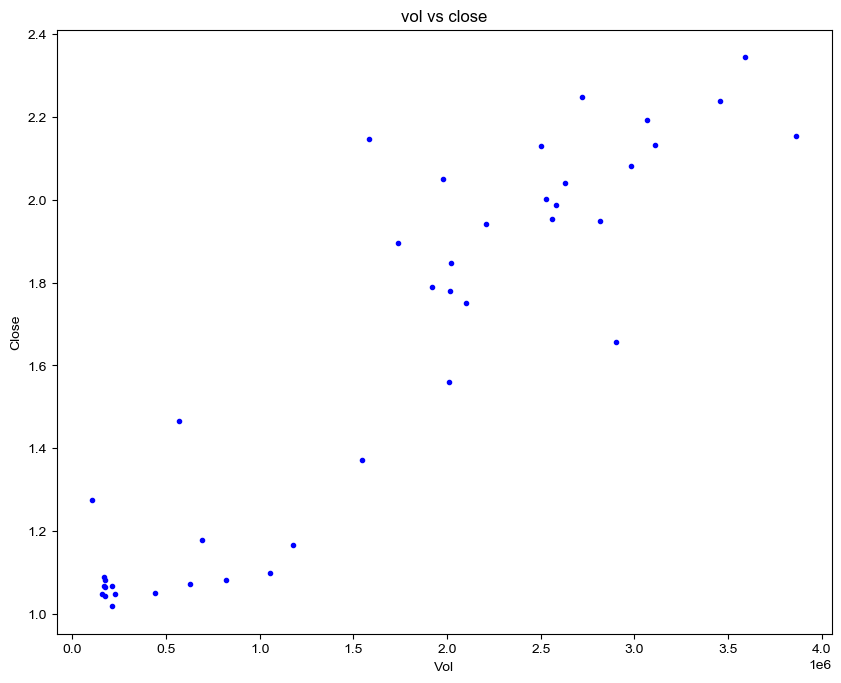

In [30]:
# plot vol vs close
fig = plt.figure(figsize=(10,8), dpi=100)
plt.plot(X[:,1],y,'b.', label = 'vol')
plt.title('vol vs close')
plt.xlabel('Vol')
plt.ylabel('Close')

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X[-momentum:], y[-momentum:])
lin_reg.intercept_, lin_reg.coef_

(1.68417803483822, array([-3.81511735e-03,  1.79551644e-07]))

In [32]:
intercept_tmp = lin_reg.intercept_
slope_tmp = lin_reg.coef_
yy3 = intercept_tmp + np.sum(slope_tmp * X[-momentum:], axis = 1) 
yy3

array([1.98468033, 1.96714317, 1.99680858, 2.05573385, 1.94734927,
       1.87287152, 2.13550989, 2.03058189, 2.27119921, 2.06195764,
       2.21411761, 2.186687  , 2.12034243, 2.09317292, 2.02678544,
       2.05660551, 2.01041904, 1.99672616, 1.851224  , 1.87964002,
       1.89301382])

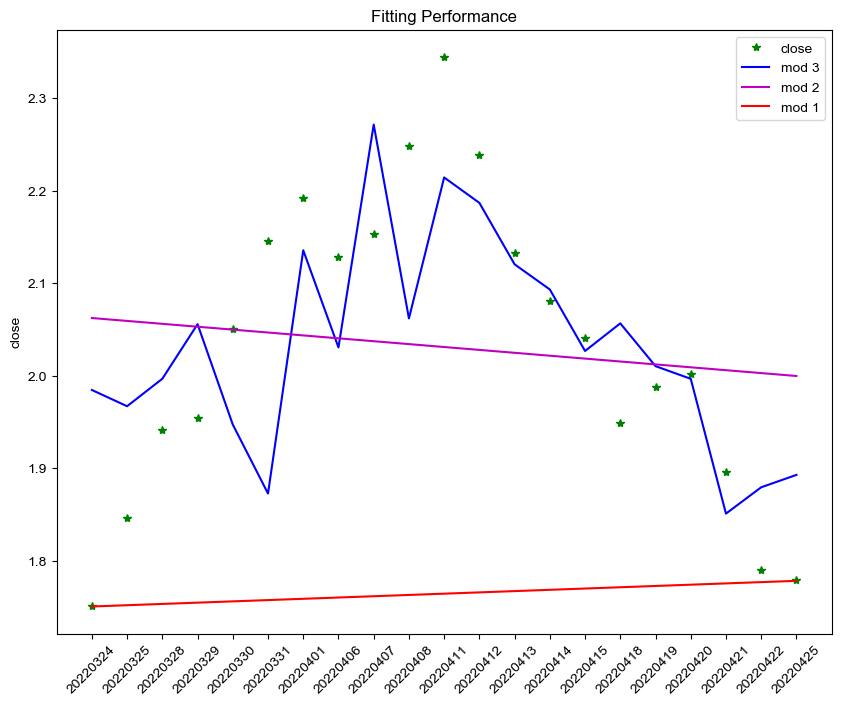

In [33]:
# plot for yy3
fig = plt.figure(figsize=(10,8), dpi=100)
plt.plot(df['trade_date'][-momentum:], y[-momentum:],'g*', label='close')
plt.plot(df['trade_date'][-momentum:], yy3,'b-', label='mod 3')
plt.plot(df['trade_date'][-momentum:],yy2,'m-', label='mod 2')
plt.plot(df['trade_date'][-momentum:],yy1,'r-', label='mod 1')
plt.title('Fitting Performance')
# plt.xlabel('days')
plt.xticks(rotation=45)
plt.ylabel('close')
plt.legend()

In [23]:
score_list2 = []
# x = np.arange(momentum) # use X above
lin_reg = LinearRegression()
for n in range(slope_num):
    # fit x and y
    # slope, intercept = np.polyfit(x, Y[n+momentum:n:-1], 1)
    # use scikit-learn linear model
    lin_reg.fit(X[n:n+momentum], y[n:n+momentum])
    slope = lin_reg.coef_
    intercept = lin_reg.intercept_
    # calculate the R^2
    r_squared = 1 - (np.sum((y[n:n+momentum] - (np.sum(slope * X[n:n+momentum], axis=1) + intercept))**2)/np.sum((y[n:n+momentum] - np.mean(y[n:n+momentum]))**2))
    # r_squared2 = 1 - (np.sum((Y - (slope * x + intercept))**2)/((len(Y) - 1) * np.var(Y,ddof=1)))
    # print(f'r_squared: {r_squared}, r_squared2: {r_squared2}')
    annualized_returns2 = np.power(np.exp(slope[0]),250) - 1
    score = r_squared * annualized_returns2
    score_list2.append(score)

score_list2

[3834.585736758116,
 13345.860852890615,
 35958.45174345182,
 84768.0758542689,
 110200.85429212742,
 68945.0091189402,
 20746.461866215246,
 4446.191093251667,
 1240.8238691701079,
 459.29105536330667,
 203.92065711342553,
 67.44280188731712]

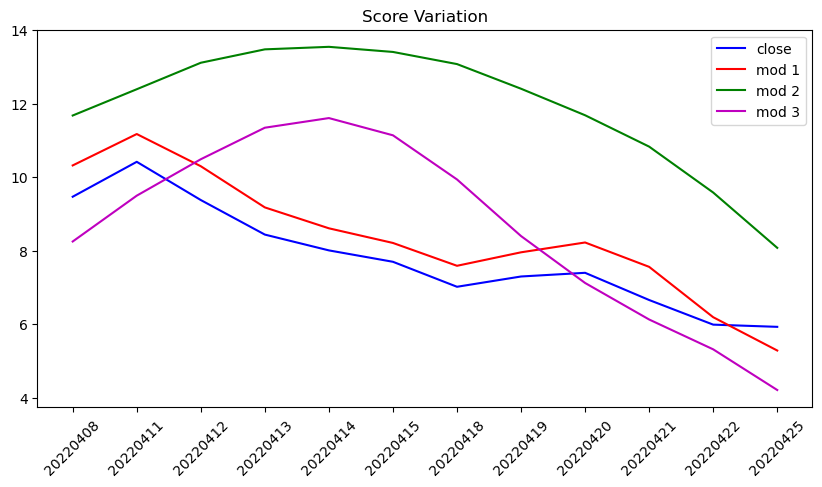

In [24]:
fig, ax = plt.subplots(1,1, figsize = (10,5), dpi = 100)
ax.plot(df['trade_date'][-slope_num:], df['close'][-slope_num:],'b-', label = 'close')
ax.plot(df['trade_date'][-slope_num:],np.log(annualized_returns),'r-', label = 'mod 1')
ax.plot(df['trade_date'][-slope_num:],np.log(score_list1),'g-', label = 'mod 2')
ax.plot(df['trade_date'][-slope_num:],np.log(score_list2),'m-', label = 'mod 3')
# rotate x label 45 degree
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title('Score Variation')
ax.legend()

# 模型四
遇事不决，机器学习。最后一种模型是因为ReLU激活函数和强势股的走势实在是太像了，所以想试一下。基本原理就是几个全连接层，是个回归问题。

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
print(tf.__version__)

2.8.0


In [33]:
data = df[['close', 'vol', 'num']]
data

,close,vol,num
0,2.86,439982.77,0
1,2.85,225987.50,1
2,2.84,174419.20,2
3,2.91,213240.92,3
4,2.95,176367.50,4
5,2.97,166387.50,5
6,2.91,171045.42,6
7,2.90,174297.70,7
8,2.85,158627.50,8
9,2.77,208787.20,9


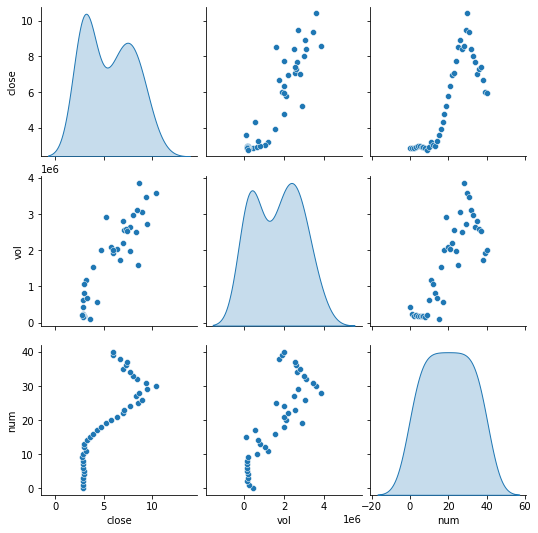

In [34]:
sns.pairplot(data, diag_kind='kde')

In [108]:
# train test split
X = data.drop('close', axis=1).to_numpy()
y = data['close'].to_numpy()
X, y

(array([[4.39982770e+05, 0.00000000e+00],
        [2.25987500e+05, 1.00000000e+00],
        [1.74419200e+05, 2.00000000e+00],
        [2.13240920e+05, 3.00000000e+00],
        [1.76367500e+05, 4.00000000e+00],
        [1.66387500e+05, 5.00000000e+00],
        [1.71045420e+05, 6.00000000e+00],
        [1.74297700e+05, 7.00000000e+00],
        [1.58627500e+05, 8.00000000e+00],
        [2.08787200e+05, 9.00000000e+00],
        [6.25388300e+05, 1.00000000e+01],
        [1.17816255e+06, 1.10000000e+01],
        [1.05214155e+06, 1.20000000e+01],
        [8.20987780e+05, 1.30000000e+01],
        [6.89502580e+05, 1.40000000e+01],
        [1.03692300e+05, 1.50000000e+01],
        [1.54343341e+06, 1.60000000e+01],
        [5.69494270e+05, 1.70000000e+01],
        [2.00788061e+06, 1.80000000e+01],
        [2.90186651e+06, 1.90000000e+01],
        [2.09858641e+06, 2.00000000e+01],
        [2.02216250e+06, 2.10000000e+01],
        [2.20862989e+06, 2.20000000e+01],
        [2.55805798e+06, 2.3000000

Epoch 1/1000
1/1 [==============================] - 0s 152ms/step - loss: 180366606336.0000 - mse: 180366606336.0000 - val_loss: 307615629312.0000 - val_mse: 307615629312.0000
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 164660150272.0000 - mse: 164660150272.0000 - val_loss: 279782916096.0000 - val_mse: 279782916096.0000
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 149761916928.0000 - mse: 149761916928.0000 - val_loss: 253463625728.0000 - val_mse: 253463625728.0000
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 135673757696.0000 - mse: 135673757696.0000 - val_loss: 228656709632.0000 - val_mse: 228656709632.0000
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 122395148288.0000 - mse: 122395148288.0000 - val_loss: 205355466752.0000 - val_mse: 205355466752.0000
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 109922484224.0000 - mse: 109922484224.0000 - val_lo

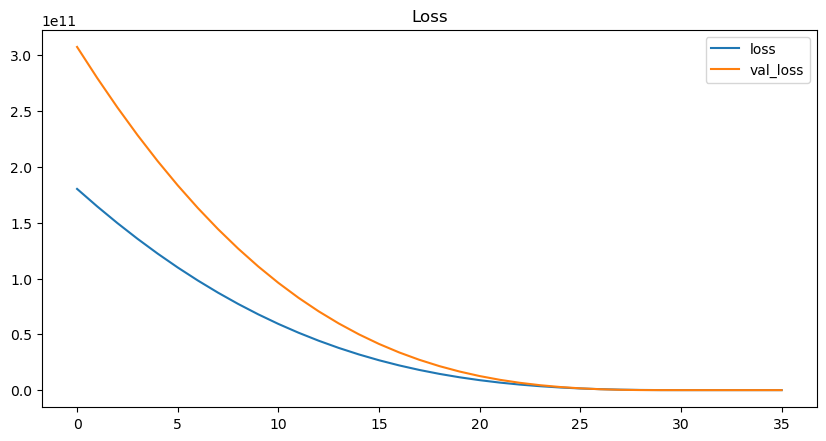

In [88]:
# build model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(2, activation='relu'),
    layers.Dense(1)
])

# choose optimizor and loss function
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# early stopping 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# train the model
history = model.fit(X, y, epochs=1000, validation_split=0.2, callbacks=[early_stop])

# plot the loss
fig, ax = plt.subplots(1,1, figsize = (10,5), dpi = 100)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_title('Loss')
ax.legend()

In [89]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                192       
                                                                 
 dense_27 (Dense)            (None, 2)                 130       
                                                                 
 dense_28 (Dense)            (None, 1)                 3         
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [93]:
# get layer2 weights
w = model.layers[2].weights
w

[<tf.Variable 'dense_28/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.5837481],
        [0.7515345]], dtype=float32)>,
 <tf.Variable 'dense_28/bias:0' shape=(1,) dtype=float32, numpy=array([-0.02560912], dtype=float32)>]

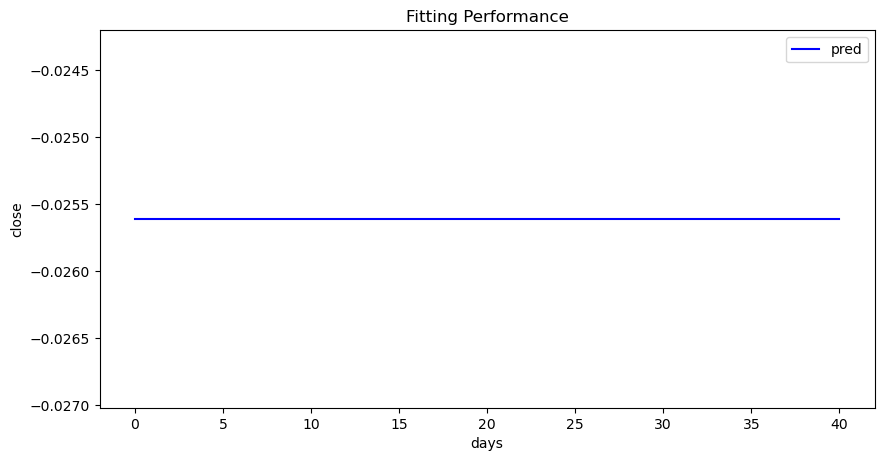

In [107]:
# plot 
pred = model.predict(X)
fig, ax = plt.subplots(1,1, figsize = (10,5), dpi = 100)
# ax.scatter(X[:,1],y,'r*', label='data')
ax.plot(X[:,1],pred,'b-', label='pred')
ax.set_xlabel('days')
ax.set_ylabel('close')
ax.set_title('Fitting Performance')
ax.legend()